# Intro
9: Introduction to Stable Diffusion

# Lesson Overview
This course covers less direct practical details. Ones you'd need to know to be a researcher or create a custom setup for industry. 

This lesson focused on a conceptual overview of how stable diffusion works. The next will be implementing it from scratch in Python. The idea being, learning the concepts first will make understanding implementation much easier. Most interestingly, Jeremy and the fast.ai team are teaching a different way of understanding SD. It is usually understood as a mathematical differential equation problem, but dropping one detail, timesteps (t), it becomes a optimiser problem. An optimiser problem is just what we've been doing already in ML for a while, it's about trying to find the best learning rate using methods such as momentum and ADAM. 

This lesson is broken down into 2 videos. The general 2-2.3hr lecture and a 40 minute notebook runthrough.

Although there is no textbook chapter for the lesson, likely because it's all brand new, there is much to do. Jeremy said that he expects people to spend on average, 10 hours a lesson.

# The topics covered, briefly
- How to rent a GPU for this course.
- An quick code overview of Stable Diffusion.
- A long thorough conceptual overview of SD. Including: Unets, Compression, Guidance, CLIP, Noise, and steps.

# Lecture Notes
## Part 1, Overview:
- GPU needs have increased for this course. Funnily enough, Collab prices have skyrocked as everyone is using it for SD. There are four options: Colab, Paperspace Gradient, Lambda Labs, Jarvis Labs. Lambda GPU is the cheapest with an offer:\$1.10/hour. Lambda is cheaper than everything else but it nor collab allow you to pause. 
- An issue is, if we use paperspace or lambda, the pipeline we downloaded will be saved, and sometimes it can take hours to download, but if we use collab then it won't.
- Training GPUs need 16/24 gb memory. My laptop is only 12gb, and it's probably not simple to optimise it for ML. I might be able to do everything that isn't training on my own PC, but I need a web service.
- Stable diffusion is moving so quickly, this lecture is already outdated. Literally in the last 24hrs before the lecture, 2 crazy new papers came out. 
- The first paper reduced the number of steps required for SD to 250 from 1000! 
- The second paper changed SD to make it 10x-20x faster! 
- I wonder if this is a result directly from SD's open source nature. The research community may well be able to improve SD much faster then say OpenAI can improve DALL-E.
- But after this first lesson, we go into the foundations which won't change often, and we'd be able to understand the updated research's details ourselves.
- We can fine-tune SD using DreamBooth, to put any object or person into an image! strmr.com is a service to do so, which costs $3.
- Jeremy links the Diffusion-nbs notebook and repo. It contains many things to play with. There's notebooks with tons of parameters we don't yet understand. I think this is the philosophy that, to understand a black box we should first get intuition for it's inputs and outputs, then kneed into the details. 
- It's not actually easy to know what prompts to give SD. The best way to learn is to look at other people's prompts and outputs. lexica.art gives plenty examples.

## Part 2, Notebook:
- First start by cloning the Stable Diffusion notebook.
- Diffusers is the HuggingFace module for this. HuggingFace has had really good packages for a while now, so using them is a good idea generally.
- We use the SD pipeline. A pipeline is similar to a fast.ai learner. It does many things automatically for us. We can also save pipelines like we save learners. 
- Unlike leaners, we can save pipelines and upload them into HuggingFace's cloud server. Like this, we can upload our own piplines and share them, or browse others' and download them.
- If we use the same pipeline with the same random seed, we get the same result. This is just like MineCraft world seeds.
- Generally, diffusion works as follows: we start with random noise, and each step we get slightly less noisy and towards the result we want. Through many steps, E.g, 50, we get our image. Although after yesterday's research it's now only 3-4 steps!
- But why don't we just do it in one step? Our models aren't smart enough, but considering we started with 1000 steps and now it's 3-4, maybe at some point they will be.
- We took the exact same prompt, four times, and pass them into our pipeline. 
- The pipeline has a variable, guidance_scale, g, meaning intuitively: 'to what degree should we focus on the caption versus just creating the image'.
- Too low guidance won't make images of the prompt, too high could be strange depending on the implementation of SD.
- It works by making an image without guidance, then image with guidance, and finding the average of them. ?
- Negative prompts work similarly. Make two images, and subtract one from another. Say we want to remove blue from the image. Subtract an image from the prompt 'blue' from it.
- Instead of passing prompts in SD, we can pass images! 
- To do so, we use image to image pipelines. Instead of starting diffusion with random noise from scratch, it starts with a noisy version of the input image, using it as a guiding point. It uses a parameter, strength, which is similar to guidance I think, to exert how strongly SD should follow the input image image. This creates a variant of our original image as we'd like.
- What if we did this multiple times? Let's take an image and pass it into SD, then pass the resulting image into SD again! We can use this to change styles of images for example!
- Fine-tuning: We take a pretrained model (from a pipeline), cut off the head, and fine tune it with our own images and captions. This will let us create images of things the pretrained model hasn't encountered, like pictures of our friends. Lambdalabs have a blog post guide for it.
- Textual inversion is a special type of fine-tuning. Create a new model embedding for some concept in some images we have. E.g. 'watercolour', and add that token to the text model, and train embeddings for it using our images. Then we can have use the prompt "Woman in the style of <watercolour>" to create it!
- Dreambooth is similar to textual inversion. Instead of making a new embedding, it finds a existing token in the embeddings that is barely used, and fine tunes it.
- Not sure why/if Textual inversion or Dreambooth is better.
- Textual inversion example. Say we have images of a teddy bear and we want to create a novel image of it riding a horse. Our model couldn't end up generating it. It was however able to generate a picture of our teddy sitting on a carpet though. The point is, sometimes textual inversion can fail.

## Part 3, Conceptual Overview:
 
### SD Model:
- Imagine that we wanted to generate hand written digits using SD. Start by assuming there's some function,f, that takes an image,X1, and returns the probability that it's a handwritten digit, P(X1).
- We get various probabilities returned from f. Say 0.98, 0.4, 0.02.
- We can use f to generate handwritten digits! If you have a function that can classify/match images to labels/vectors, you can create a model to do the inverse, create a new image to match the labels/vectors.
- Imagine we had a mess of an image that is supposed to be an handwritten digit. It's 28x28, 784 px. We pick one of these pixels, and make it a little bit lighter or darker. We then pass it into f and see how the probability changes. If it increases, then we've gotten something that's more like a handwritten digit. If we do this enough times for every pixel, then we could create an image of a digit, even from starting from pure noise!
- We should optimize this process using gradients. 
- Start by finding the gradient of the probability that our input image, X, is a digit, w.r.t the gradient of X's pixels. The gradient represents, 'how much does the probability X is a digit increase as we increase the pixels' values'. Our gradient will have 784 values, one for each pixel.
- Then we change the image pixels using this gradient. Take every pixel and subtract it by it's own gradient w.r.t the probability, multiplied by a constant (like a learning rate), C. In maths: X + C*(Gradient) 
- This method, finding the derivative of every pixel, so finding 784 derivatives, is called the finite differencing method of differencing. 
- But we need not do this, it's slow and computationally expense. Instead, simply use f.backward() in Python to use analytics derivatives to do it super quick. X.grad from f.backward() gives us all 784 gradients.
- The we simply repeat X + C*(Gradient) enough times to get our result: turning a noise image into a handwritten digit. 

### The Probability Function, f
- But how do we get our probability function f? 
- Using a neural network, of course!
- We first get training data, that is, images of handwritten digits with a random amount of noise added to them.
- We then train a neural network to try and predict how much noise is in a training image, I.E, what part of the image is noise and what part is not.
- A way to think about it is sketched below, we input the first image, and our network tries to predict the third. For the first example, the digit 9 has no noise. 7 has some noise. 3 has much noise, 6 further so.

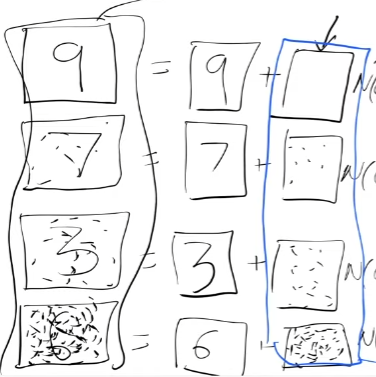

- We use can use MSE as our loss function for this network. 
- We can calculate it by adding the LHS together (remember that we have the non-noisy input images), and seeing how it compares to the input noisy image.
- But wait, this process can actually just be used to generate an image for us instead of using a probability function f. 

### Unets
- We'll call use a unet for this network from now on and call it that.
- If we pass an image of pure noise into our unet, it returns info about what parts of an image it thinks is the noise for a handwritten digit image. Like, 'if we left behind these pixels that aren't noise, it would look a little bit more than a handwritten digit'.
- If we did this multiple times, we could turn pure noise into a handwritten digit!
- Noise itself is defined such that, if we subtract the noisy input image by the noise, we will get an image without/with less noise.

### Compression
- The issue is that we have too many pixels to do this practically.
- For example, a standard 512x512x3 image is 786432 px! And if we had millions of images, this is impossible unless you're Google!
- But we can do this more efficiently. Storing the exact pixel values isn't the most efficient way to store them. For instance, if we had a line of just blue pixels, why not store just info saying that. Jpg files are an example of compressing images.
- Let's compress our image in a particular way. Put the image through a convolution layer of stride 2, and it'll result in an 256x256x6 image. Then again, 128x128x12, then again, 64x64x24.
- Now a few resnet blocks to get 64x64x4. The number of pixels left is 16384, which is 48x less than the original! 
- This is pointless if we can't reconstruct our full sized image well. 
- We can go backwards! Take our 64x64x4 image into a inverse convolution, giving us 128x128x12, then again and again back to 512x512x3, our original image.
- This entire thing, both the compress (encoder) and decompress (decoder) is one neural network called an autoencoder, or in this case, a VAE.
- The reconstruction part, the decoder, will give us random noise back, so we need a loss function to optimise it. 
- Our loss function is just a comparison between the input image and output image using MSE. If reconstruction is done 100% correctly, then the MSE is just 0.
- We can save decoder separately, and share it with others. This lets us share full images of things using only the compressed image. They don't need the encoder.
- But wait, if the compressed image had all the information needed to reconstruct the original, then there's no point using the original massive image for training! The compressed version has all the information we need!

## So, to train our unet:
- We put all the training images (which we've added noise to) through the autoencoder to compress them,
- We then train the unet on these compressed noisy images. 

The compressed images are called latents.
The output of the unet is now the noise present in the latents.
To get back to our original images, we subtract the noise from the latents, then use the decoder to get them back into full size.

### Guidance
With this new unet, VAE combination in mind, we can produce handwritten digits sure, but how do we get it to produce images based on prompts?

## Firstly let's understand how to add guidance (extra information) to the unet to improve it using our handwritten digit example.
- Previously we just inputted noisy handwritten digits as inputs, and made the unet find the noise. 
- But now, in addition to giving just noisy handwritten digits as inputs, we can also give something like labels to each input image. E.g, inputting a noisy 3 digit and a label of 3.
- It's not exactly a label we give, we give a onehot encoded vector that specifies what digit it is. I think the way we create this vector is arbitrary. If we kept the labels consistent for all the training data then it shouldn't matter? E.g. the number eight label is just a vector thats (0,0,0,0,0,0,0,1,0,0).
- Now it will learn both how to predict the noise in an image, but what the image is supposed to be. It should be better at predicting noise now it has this extra info (called guidance).
- For example, input a noisy 3 digit and a label of 3, the unet will 'think', 'the noise is everything that doesn't represent the number 3'.

## With that in mind, we can understand how to produce a picture based on a prompt.
- Say we wanted to create a picture of 'a cute teddy bear'. 
- Unlike handwritten digits, it's not easy to know how to construct the guidance/labels to add to each noisy input image. 
- This is because, unlike handwritten digits where there's a small finite amount, we couldn't possibly encode every possible input for every possible word in English. You could technically make 'a cute teddy bear' into a one-hot vector, but it would be impossible to make and store all possible prompts into one-hot vectors.
- So instead, we have to create yet another model to assist us!

### CLIP
- Our new model takes a prompt, e.g. 'a cute teddy bear', and outputs some vector that represents that prompt. 
- If we had a good vectors to represent our prompts, it's like generating handwritten digits, we have a good noisy image label so our unet can generate images for us.
- To create our new model, we can look Online. For accessibility, people have already captioned (created prompts) of images. 
- Say we find an image online captioned 'a graceful swan'.
- We have two encoders, a textencoder, that takes a caption as input and generates a string (a UTF-8 encoding) of it, and a imageencoder, which takes an image as input and generates a string. 
- The details behind what these strings are will be passed for now.
- For 'a graceful swan':
- Textencoder takes 'a graceful swan' as input and creates it's own embeddings/features to create its string. 
- Imageencoder takes the image of it as input and creates it's own embeddings/features to create its string.
- We want the embeddings created for 'a graceful swan' from these two encoders to be the same. This signifies that both encoders are producing and using similar features/embeddings to encode image and text.
- Because the embeddings are vectors, we can dot product them. We want their dot product to be really big, because that signifies that they are similar.
- With this, we can create an embedding matrix, for all the training images, 4 in this example:

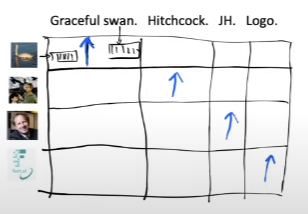

- We not only want matching prompts and images to have a high dot product, but non matching images to have a low dot product.
- The latter is because, say for our 'a graceful swan' prompt, our textencoder will have features for it, and a non-matching image say the one of Jeremy, will have the imageencoder have features of his image. These features shouldn't match, because they are representing different things.
- In short, the diagonals should be high and non diagonal should be low.
- We can then create a loss function for this! It's simply: add up all the diagonal and subtract all the non diagonal.
- If we do this, we will end up with a really good textencoder, that can take prompts, and produce good labels/vectors to represent it. 
- Our setup is called multimodel because we have >1 model.
- This pair in particular is called CLIP.
- The loss function described is called in the embedding matrix is called contrastive loss.
- Finally, we can now take our 'a cute teddy' prompt, put it into textencoder, get features representing it, and use them to act as a label/vector!

## To summarise:
- CLIP takes prompts as input and produces embeddings for them. Prompts with similar meanings gives us similar embeddings. We use Clip's embeddings as guidance, a sort of label to noisy input images into our unet, which is pivotal for it to be able to generate images.

### Overview of the 4 models:
- Unets take noisy latents (compressed images) in and outputs their noise. We can subtract the two to get the latents back.
- VAE's decoder takes latents and decompresses them back into full original image size.
- CLIP Text Encoder takes prompts and produces embeddings. We use these embeddings as guidance to train the unet.
- SD is the process of starting with noise and producing a full image. It works by starting with pure noise, then using a unet to identify noise (defined as pixels that aren't our target) and subtracting it repeatedly. 

### Noise in Training Data
- Recall, that there must be noise in our unet input images. 
- The language involved is weird, but just ignore it. 
- There's a concept called "time steps".  It has nothing to do with time. It's about have varying levels of noise in the unet input images. 
- We can create a noising 'schedule'. E.g, We randomly pick a number of 1 to 1000, Say 4, and we lookup how much noise to use if we happen to get it following this graph:

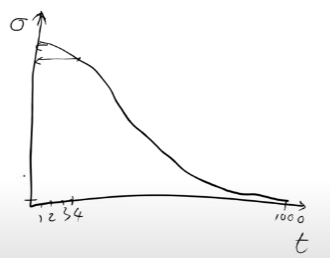

- The timestep 1000 has no noise.
- This entire concept is just a way to pick how much random noise to add to images to use them for unet training.
- This t plotted above is called a timestep, and again, it has nothing to do with time.
- The y axis is sigma, or B, and all it means is the amount of noise.
- For every minibatch image, we randomly pick a timestep to pick an random amount of noise, and then train with it.

## Steps

Recall in the lecture, when we tried to create an image from a prompt in one step, it didn't look good:

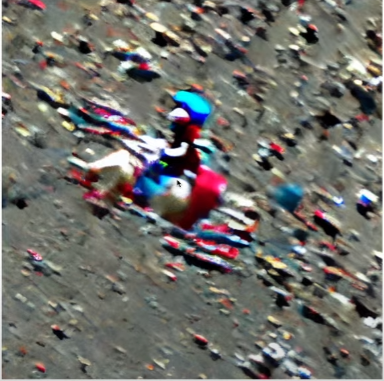

## Steps
- This occurred because having only one step means we subtracted all the noise in one go.
- Doing it in multiple steps resolves the issue.
- But then we run into the issue: what constant should we use to dictate how much noise we should subtract per step? How should we add noise? These are research questions and the properties of a diffusion sampler.

- But think about the noise subtraction equation, P = P - C * N, the picture is the picture - a constant multiplied by the noise.
- It looks a lot like a deep learning optimiser! The constant is just a learning rate. Why not use LR concepts like momentum! Or Adam!

- The thing is, diffusion models' unets' don't just train on an input image and guidance, they take timesteps t as a variable too too. 
- The idea is that the unet will get better at removing noise if it has the extra info of how much noise we're adding (t).
- Jeremy doubts this is needed because neural nets can easily solve the noise problem.
- If we remove t, then the differential equations approach is much simpler and becomes an optimiser problem we're already famimilar with!
- For unets also, MSE is usually used in ML because it's easy. But what if we use more sophisticated loss functions. Like perceptual loss. 
- There's a lot of novel research in this area, particularly in abandoning t and thinking of everything as an optimiser. 

# Links
- As I am doing this lesson as it is released privately live, I cannot share links to the resources.